# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print("""-----------------------------
Beginning Data Retrieval      
-----------------------------""")
def set_func(cities, set_size):
    for i in range(0, len(cities), set_size):
        yield cities[i: i + set_size]

set_size = 50
city_sets = set_func(cities, set_size)

def weather_func(city):
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{url}appid={weather_api_key}&q={city}"
    response = requests.get(query_url).json()
    return response

def city_func(cities):    
    number = 1
    city_weather = []
    for c in city_sets:
        r = 1
        for city_name in c:
            data = weather_func(city_name)
            data
            # include format string into it along with try catch if city is not found
            if data['cod'] == 200:
                print(f'Processing Record {r} of Set {number} | {city_name}')
                # Save data into another list
                city_lat = data["coord"]["lat"]
                city_lng = data["coord"]["lon"]
                city_cloud = data["clouds"]["all"]
                city_temp_max = data["main"]["temp_max"]
                city_humid = data["main"]["humidity"]
                city_wind = data["wind"]["speed"]
                city_country = data["sys"]["country"]
                city_date = data["dt"]
                city_weather.append({"City": city_name,
                                     "Lat" : city_lat,
                                     "Lng" : city_lng,
                                     "Max Temp" : city_temp_max,
                                     "Humidity" : city_humid,
                                     "Cloudiness" : city_cloud,
                                     "Wind Speed" : city_wind,
                                     "Country" : city_country,
                                     "Date" : city_date}) 
                
                
                r += 1
            else:             
                print('City not found. Skipping...')
        number += 1
    return city_weather

Final = city_func(city_sets)
print("""-----------------------------
Data Retrieval Complete      
-----------------------------""")

-----------------------------
Beginning Data Retrieval      
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | bukachacha
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | banda aceh
City not found. Skipping...
Processing Record 5 of Set 1 | sompeta
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | ulladulla
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | wattegama
Processing Record 13 of Set 1 | seymchan
Processing Record 14 of Set 1 | araouane
Processing Record 15 of Set 1 | makakilo city
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | tuatapere
Processing Record 19 of Set 1 | samarai
Processing Record 20 of Set 1 | hobart
Processing Record 21 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_weather_df = pd.DataFrame(Final)
city_weather_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_weather_df.loc[city_weather_df["Humidity"] > 100]

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []

In [8]:
#  Get the indices of cities that have humidity over 100%.
city_weather_df.describe()

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  569.000000   
mean    20.197276   18.720018  293.986661   70.943761   52.630931    3.438014   
std     33.090388   89.313556    7.597481   20.022443   37.874805    2.271860   
min    -54.800000 -175.200000  266.150000   10.000000    0.000000    0.100000   
25%     -7.940000  -59.950000  288.100000   59.000000   14.000000    1.710000   
50%     24.050000   25.570000  294.960000   76.000000   63.000000    3.000000   
75%     47.870000   95.220000  299.150000   87.000000   90.000000    4.600000   
max     77.480000  179.320000  314.150000  100.000000  100.000000   12.990000   

               Date  
count  5.690000e+02  
mean   1.595288e+09  
std    9.240793e+01  
min    1.595288e+09  
25%    1.595288e+09  
50%    1.595288e+09  
75%    1.595288e+09  
max    1.595288e+09

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame
City_Data = city_weather_df

# Export the City_Data into a csv
City_Data.to_csv (r'../output_data/City_Data.csv', index = False, header=True)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

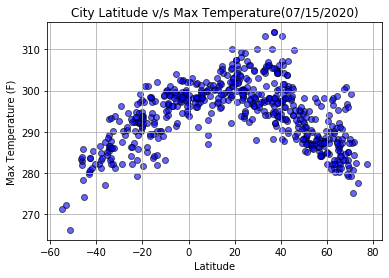

In [11]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Max Temp"] , marker="o", facecolors="blue", edgecolors="black",
            alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude v/s Max Temperature(07/15/2020)")
plt.grid()
plt.savefig('../output_data/Lat_Temp.png')
plt.show()

## Latitude vs. Humidity Plot

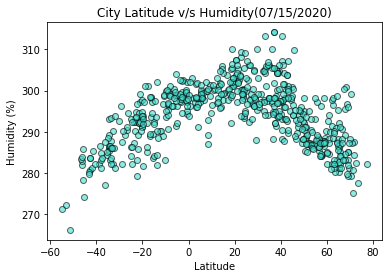

In [12]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Max Temp"]  , marker="o", facecolors="turquoise", edgecolors="black",
            alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude v/s Humidity(07/15/2020)")
plt.savefig('../output_data/Lat_Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

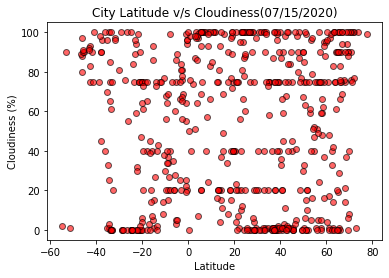

In [13]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Cloudiness"]  , marker="o", facecolors="red", edgecolors="black",
            alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude v/s Cloudiness(07/15/2020)")
plt.savefig('../output_data/Lat_Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

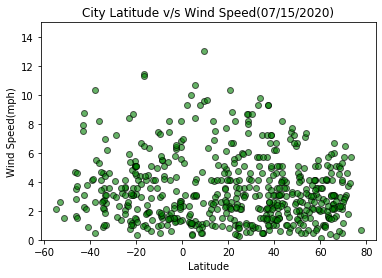

In [14]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Wind Speed"]  , marker="o", facecolors="green", edgecolors="black",
            alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("City Latitude v/s Wind Speed(07/15/2020)")
plt.ylim([0,15])
plt.savefig('../output_data/Lat_Wind Speed.png')
plt.show()

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames
Northern_df = City_Data.loc[city_weather_df["Lat"] >= 0]
Northern_df

Southern_df = City_Data.loc[city_weather_df["Lat"] < 0]
Southern_df



City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
1    puerto ayora  -0.74  -90.35    294.26        85          94        2.68   
5           vaini -21.20 -175.20    297.15        64           0        3.60   
6        hermanus -34.42   19.23    285.93        70           1        0.89   
7       cape town -33.93   18.42    283.15        93           0        2.10   
8       ulladulla -35.35  150.47    284.26        53           1        4.10   
..            ...    ...     ...       ...       ...         ...         ...   
550    monteagudo -19.82  -63.98    291.95        72          73        0.35   
557        tambun  -6.26  107.07    298.15        94          20        1.42   
559     namatanai  -3.67  152.43    302.57        67          25        2.17   
565    arenapolis -14.45  -56.85    297.35        41          27        1.91   
567    rio grande -32.03  -52.10    293.71        76          96        3.59   

    Country        Date  
1        EC  1595287989  
5        TO  1595287913  
6        ZA  1595288106  
7        ZA  1595287661  
8        AU  1595288147  
..      ...         ...  
550      BO  1595288200  
557      ID  1595288201  
559      PG  1595288201  
565      BR  1595288119  
567      BR  1595287941  

[179 rows x 9 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4262675175963572


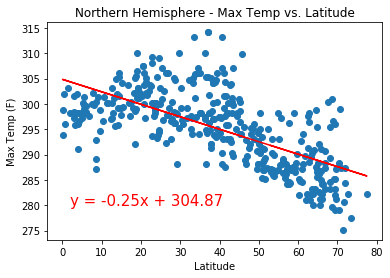

In [21]:
x_values = Northern_df["Lat"]
y_values = Northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,280),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/Northern_MaxTemp_Lat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6318378129166698


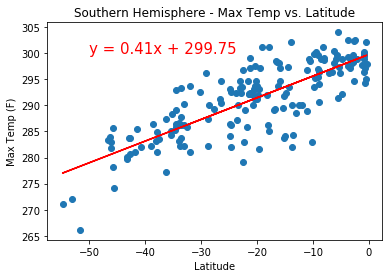

In [22]:
x_values = Southern_df["Lat"]
y_values = Southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,300),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/Southern_MaxTemp_Lat.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.001189429270647436


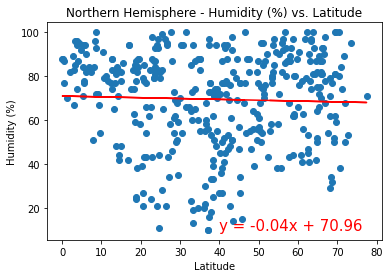

In [25]:
x_values = Northern_df["Lat"]
y_values = Northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/Northern_Humidity_Lat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02175417670614673


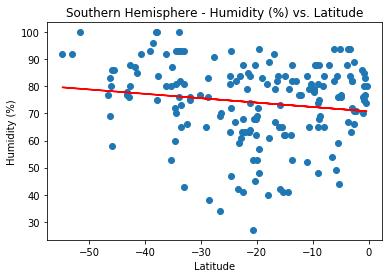

In [26]:
x_values = Southern_df["Lat"]
y_values = Southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/Southern_Humidity_Lat.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002291020303921336


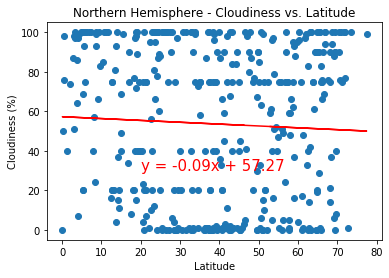

In [27]:
x_values = Northern_df["Lat"]
y_values = Northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/Northern_Cloudiness_Lat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01986540901171813


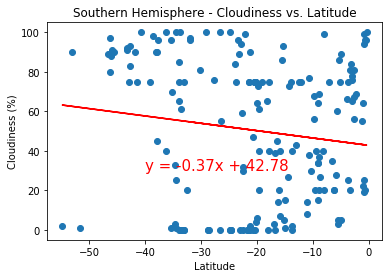

In [28]:
x_values = Southern_df["Lat"]
y_values = Southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/Southern_Cloudiness_Lat.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012121138406856701


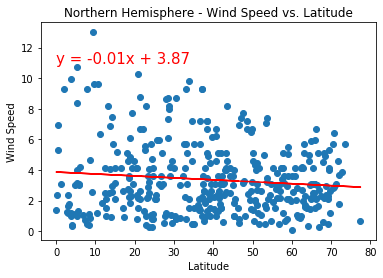

In [29]:
x_values = Northern_df["Lat"]
y_values = Northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/Northern_Wind_Lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.000290033711947196


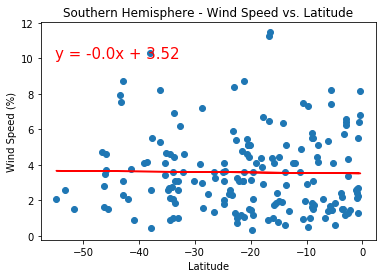

In [30]:
x_values = Southern_df["Lat"]
y_values = Southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/Southern_Cloudiness_Lat.png')
plt.show()

## Analysis
#### 1) There is strong correlation between latitude and temperature.
#### 2) There is almost no correlation between cloudiness and latitude.
#### 3) The higher latitudes have lower temperatures and the lower latitudes have higher temperatures.
#### 4) The correlation between latitude and wind speed is very weak.
#### 5)The correlation between humidity and latitude is very weak.

